In [123]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/datasets/laptop_price.csv",encoding="latin-1")

In [125]:
df.head()

laptop_ID Company      Product  ...  OpSys  Weight Price_euros
0          1   Apple  MacBook Pro  ...  macOS  1.37kg     1339.69
1          2   Apple  Macbook Air  ...  macOS  1.34kg      898.94
2          3      HP       250 G6  ...  No OS  1.86kg      575.00
3          4   Apple  MacBook Pro  ...  macOS  1.83kg     2537.45
4          5   Apple  MacBook Pro  ...  macOS  1.37kg     1803.60

[5 rows x 13 columns]

In [126]:
df.describe

<bound method NDFrame.describe of       laptop_ID Company  ...  Weight Price_euros
0             1   Apple  ...  1.37kg     1339.69
1             2   Apple  ...  1.34kg      898.94
2             3      HP  ...  1.86kg      575.00
3             4   Apple  ...  1.83kg     2537.45
4             5   Apple  ...  1.37kg     1803.60
...         ...     ...  ...     ...         ...
1298       1316  Lenovo  ...   1.8kg      638.00
1299       1317  Lenovo  ...   1.3kg     1499.00
1300       1318  Lenovo  ...   1.5kg      229.00
1301       1319      HP  ...  2.19kg      764.00
1302       1320    Asus  ...   2.2kg      369.00

[1303 rows x 13 columns]>

In [127]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [128]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [129]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [130]:
df.describe(include=['object'])

Company Product  TypeName  ...                    Gpu       OpSys Weight
count     1303    1303      1303  ...                   1303        1303   1303
unique      19     618         6  ...                    110           9    179
top       Dell  XPS 13  Notebook  ...  Intel HD Graphics 620  Windows 10  2.2kg
freq       297      30       727  ...                    281        1072    121

[4 rows x 10 columns]

In [131]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns

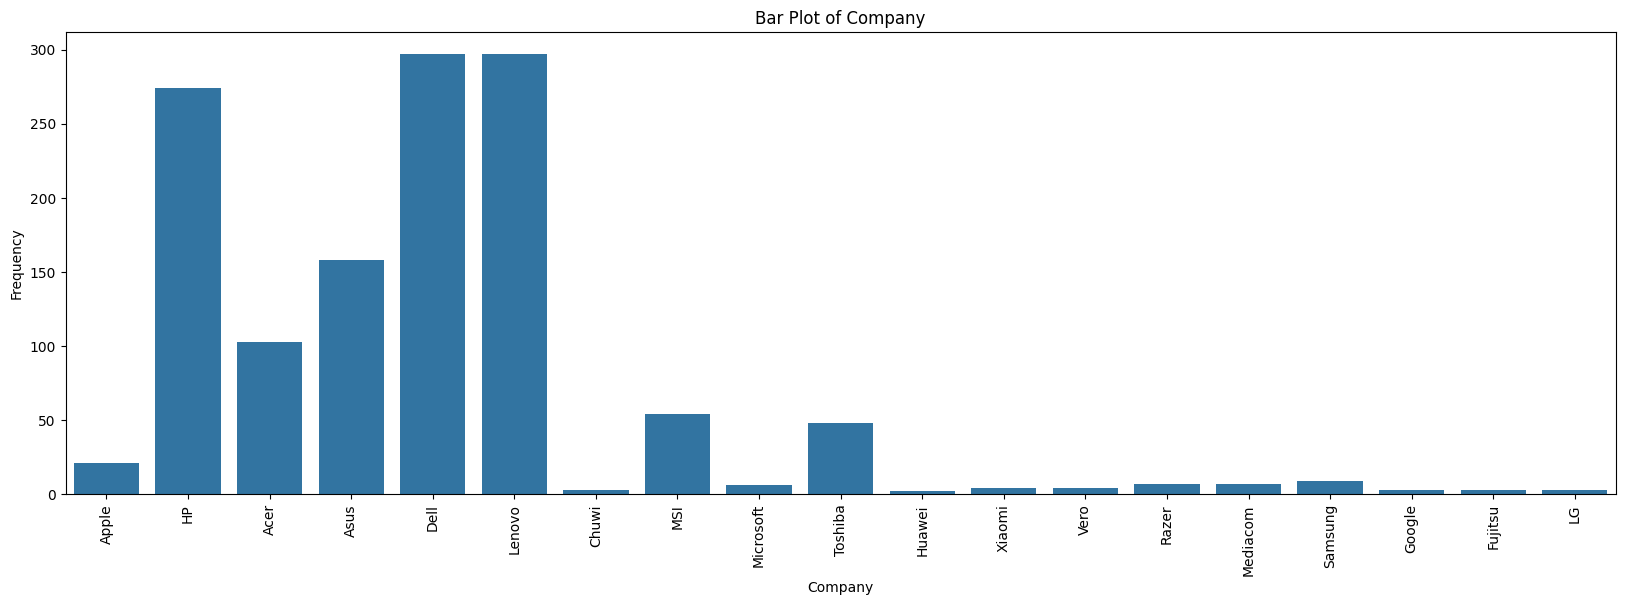

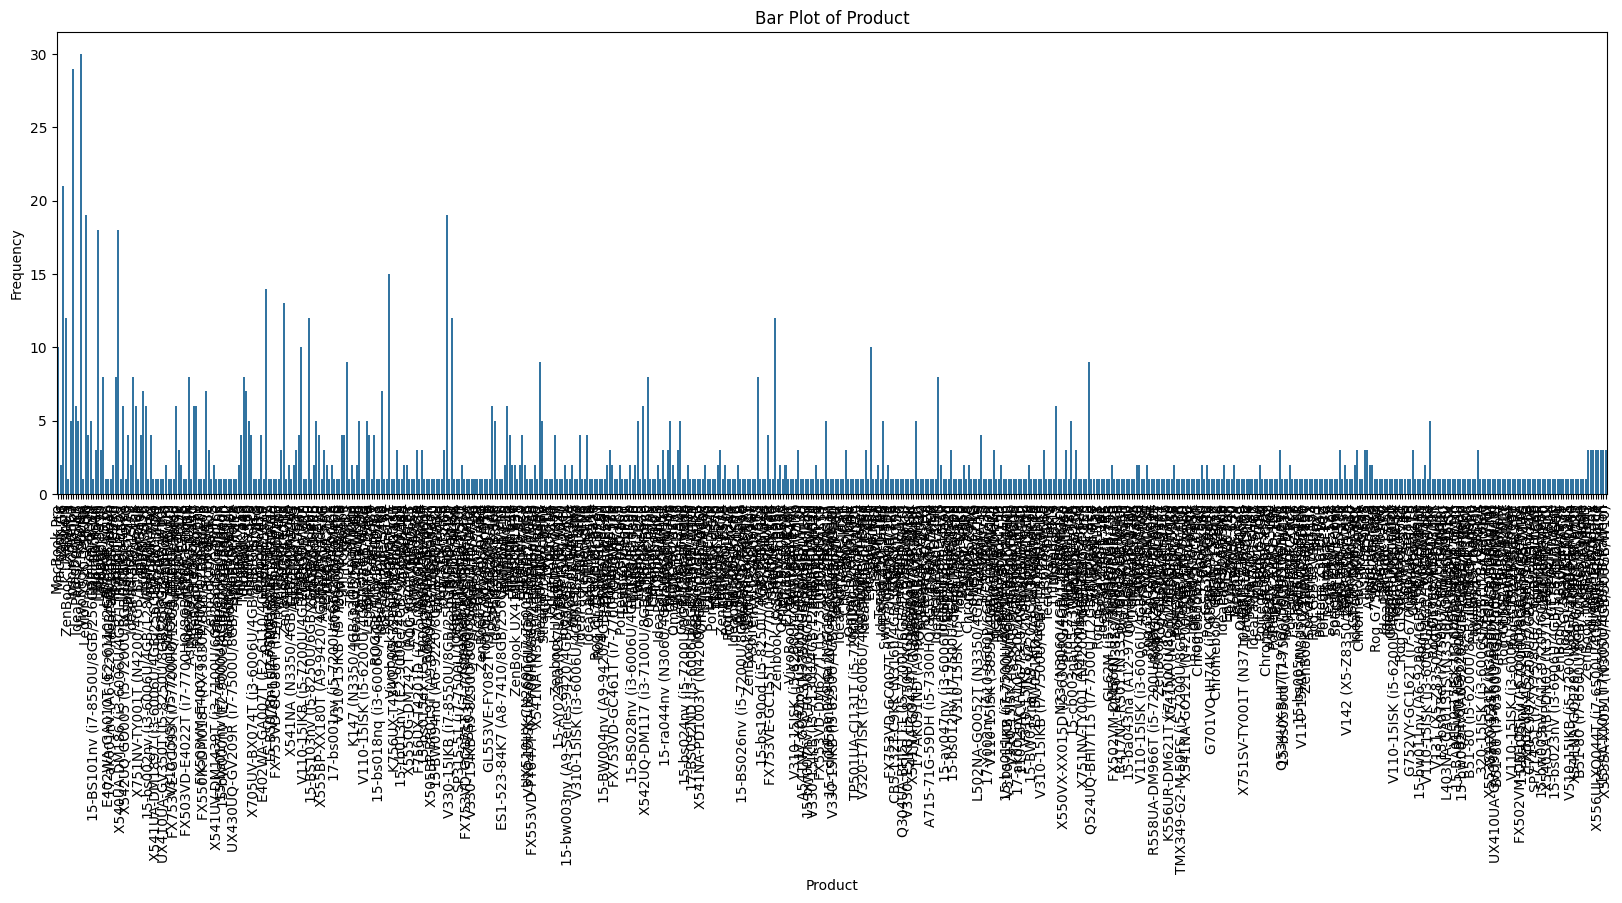

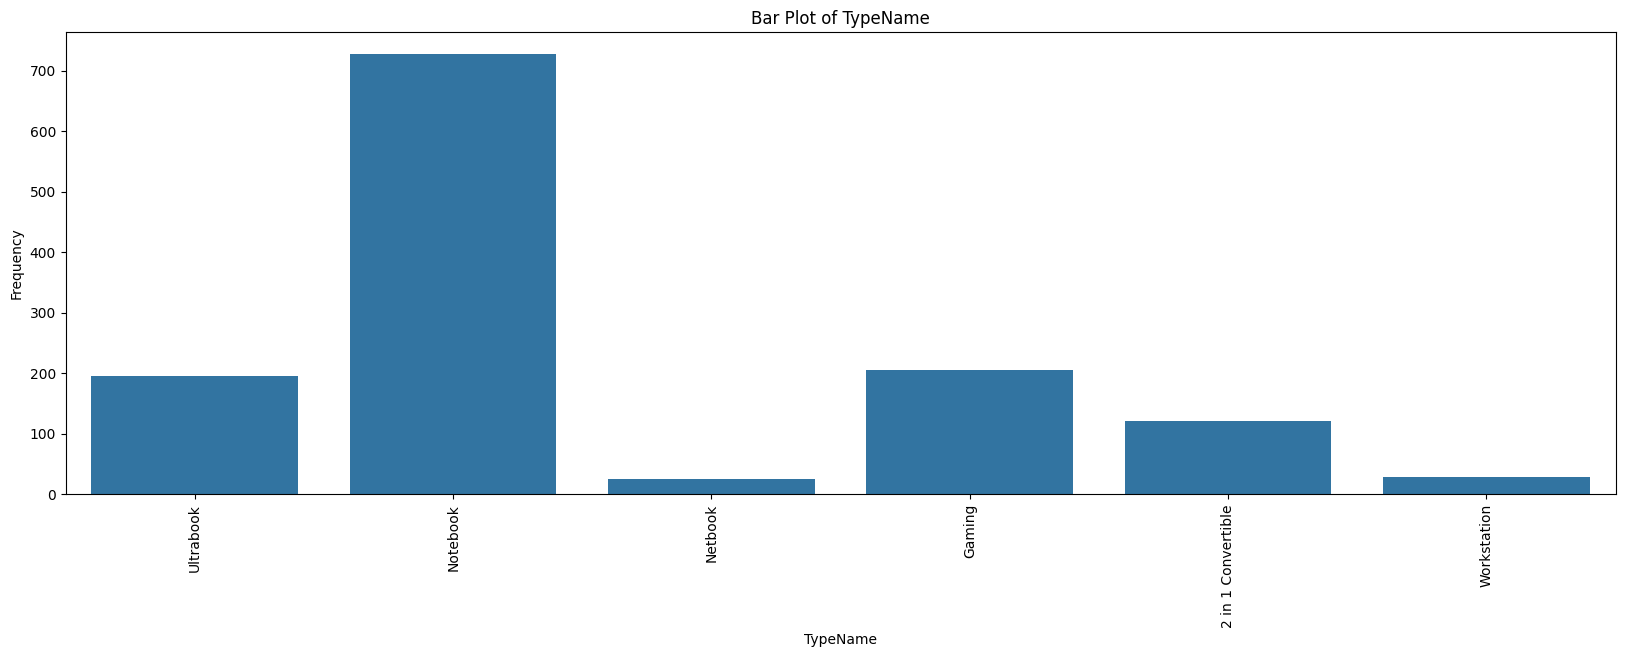

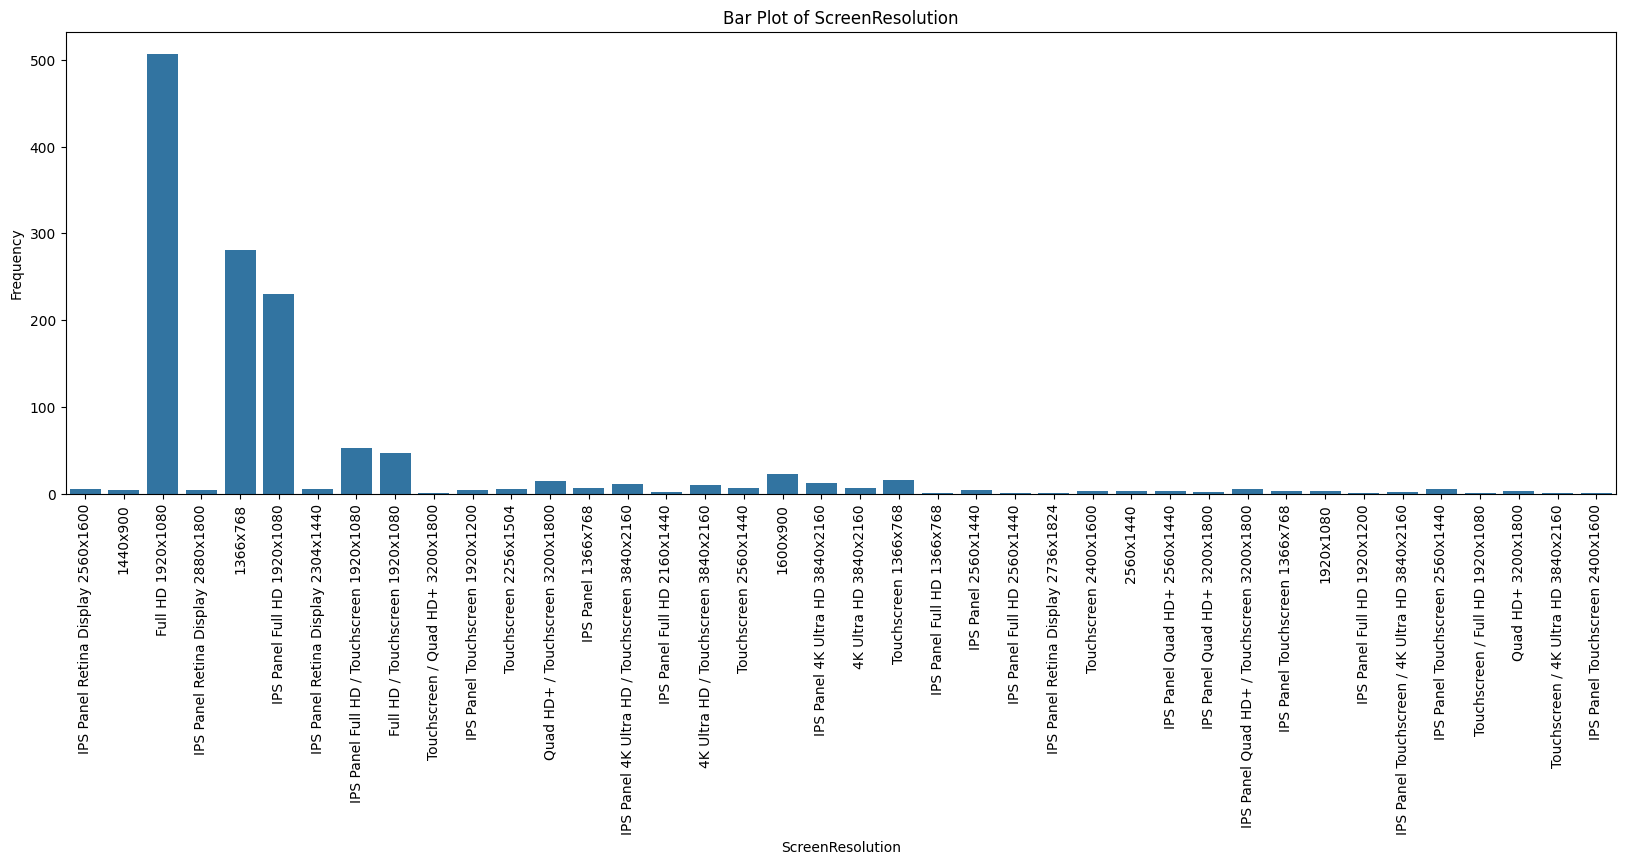

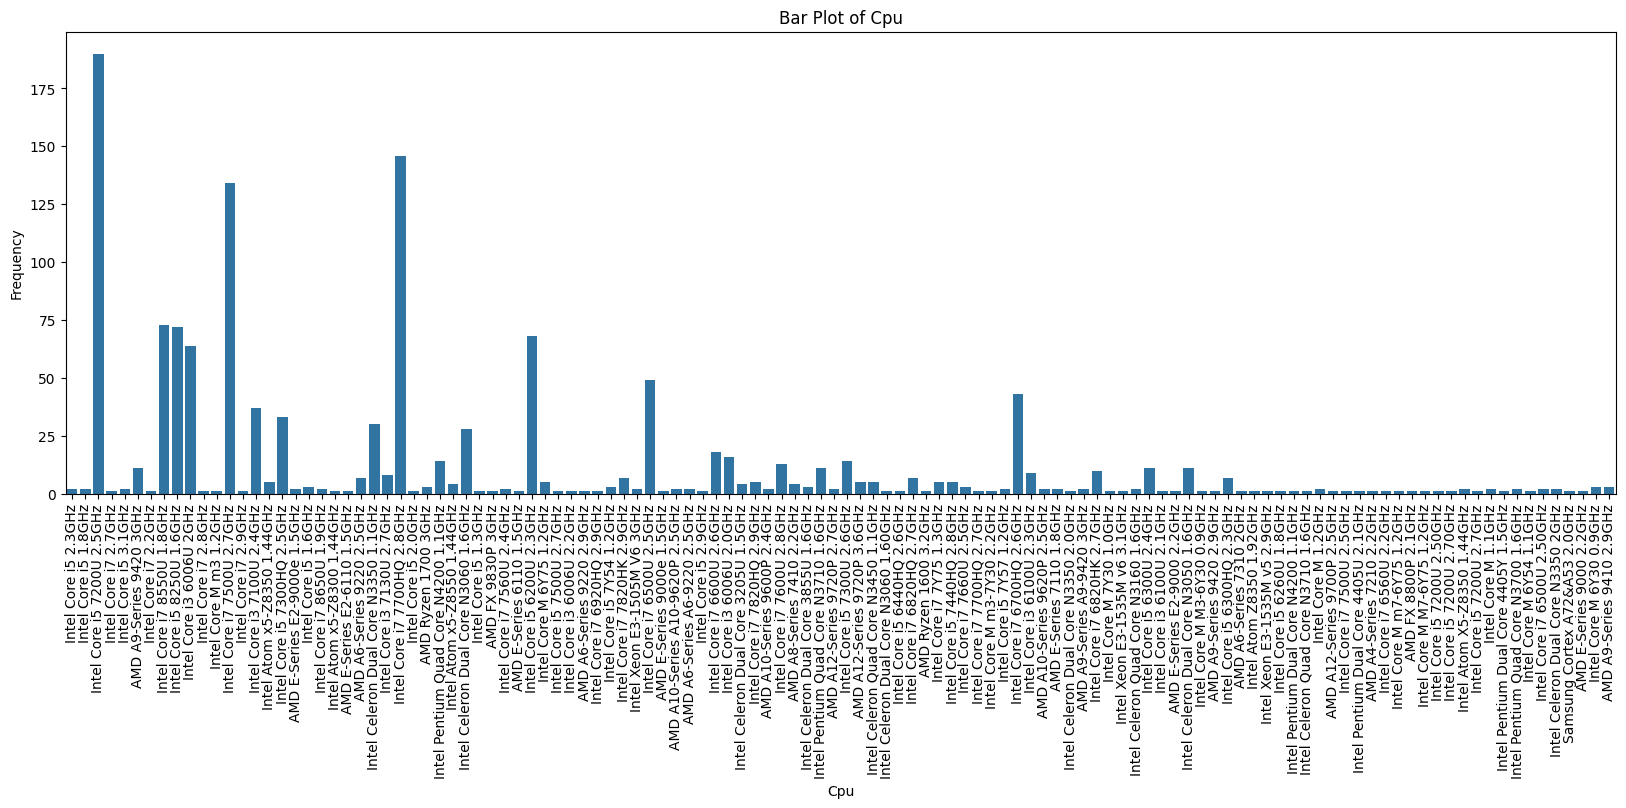

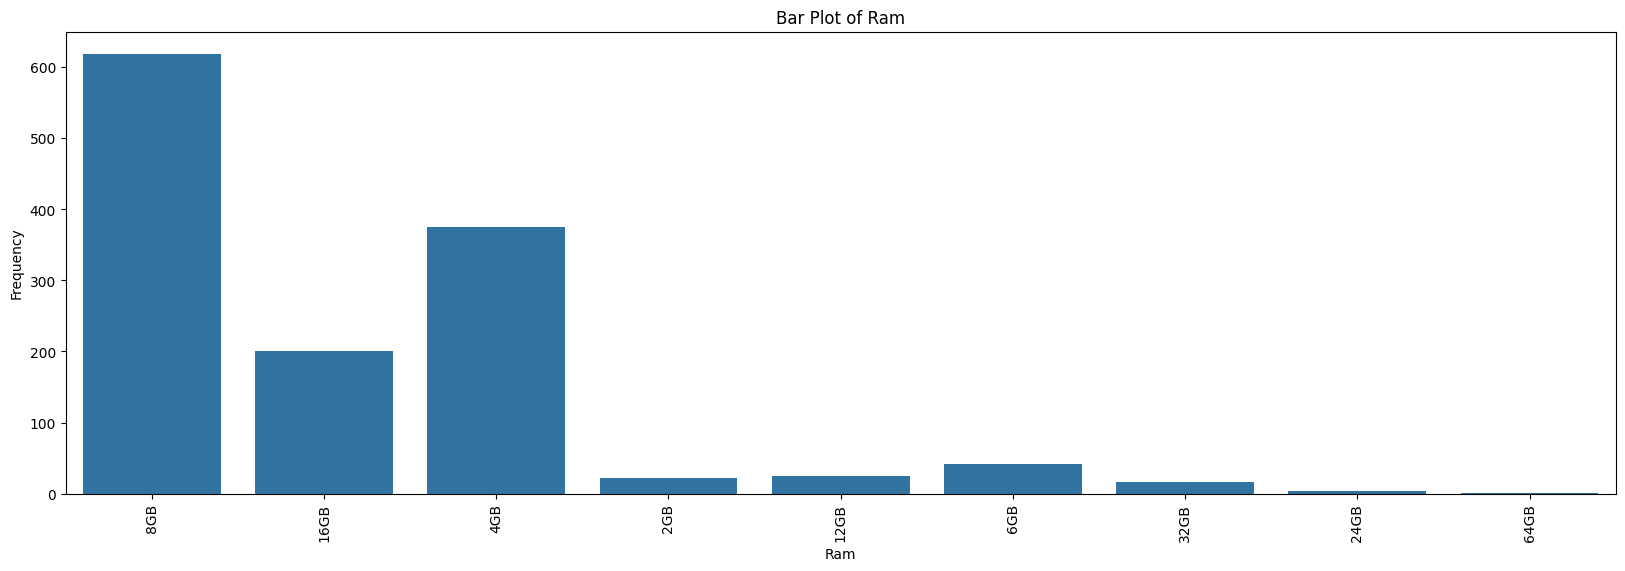

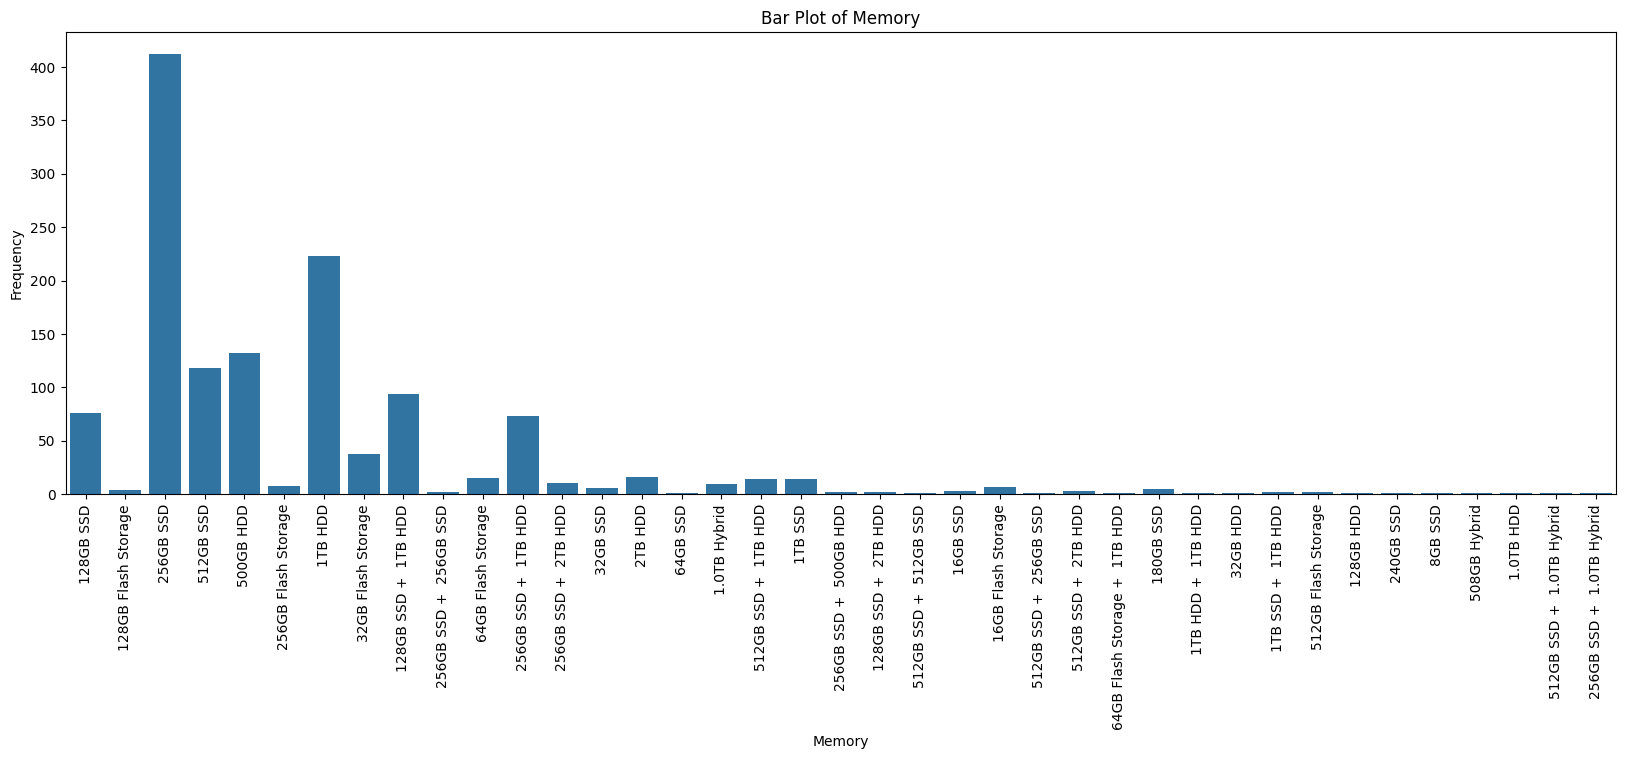

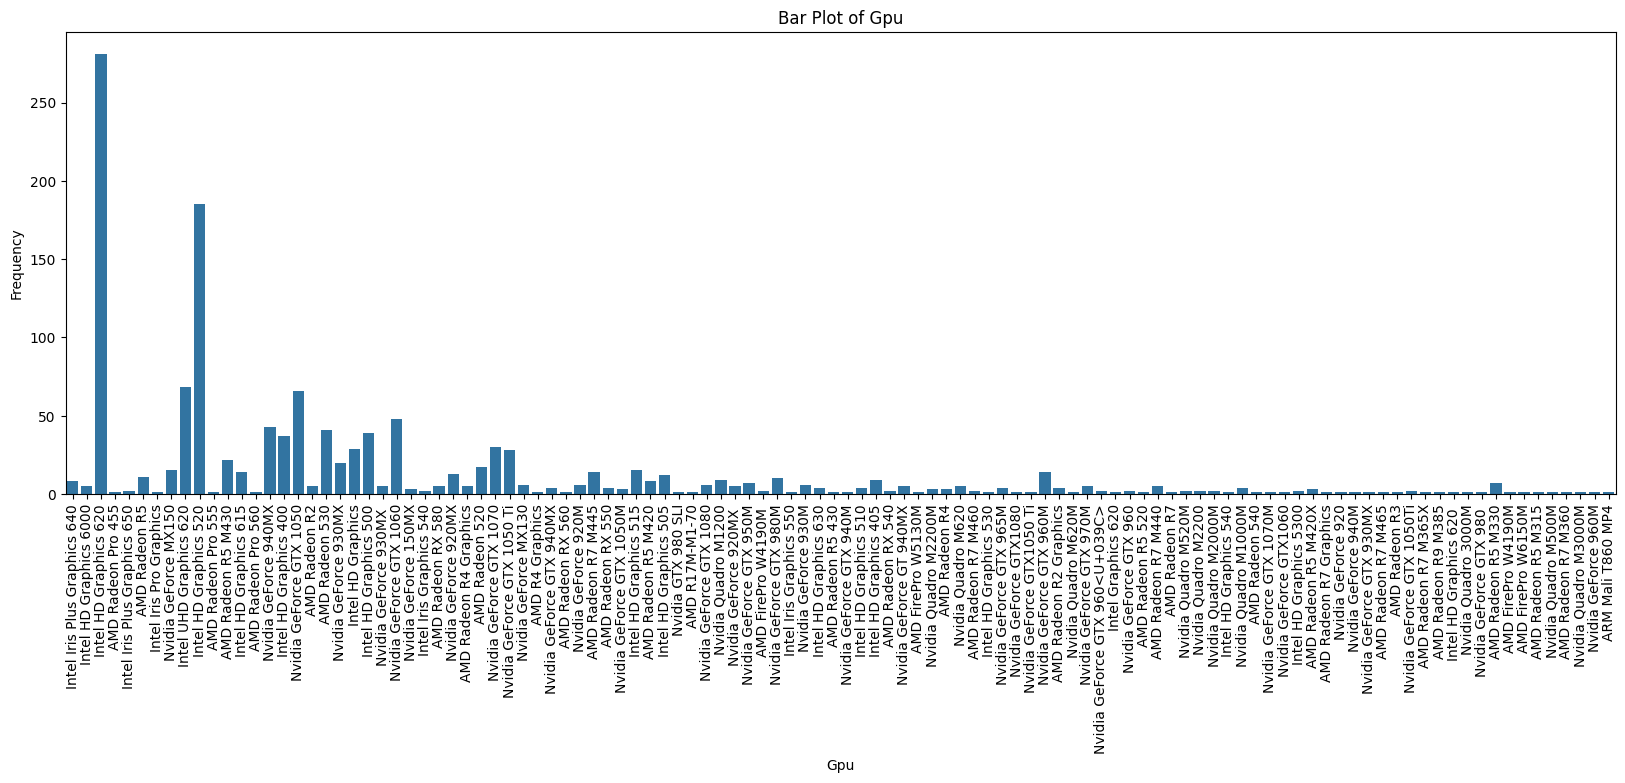

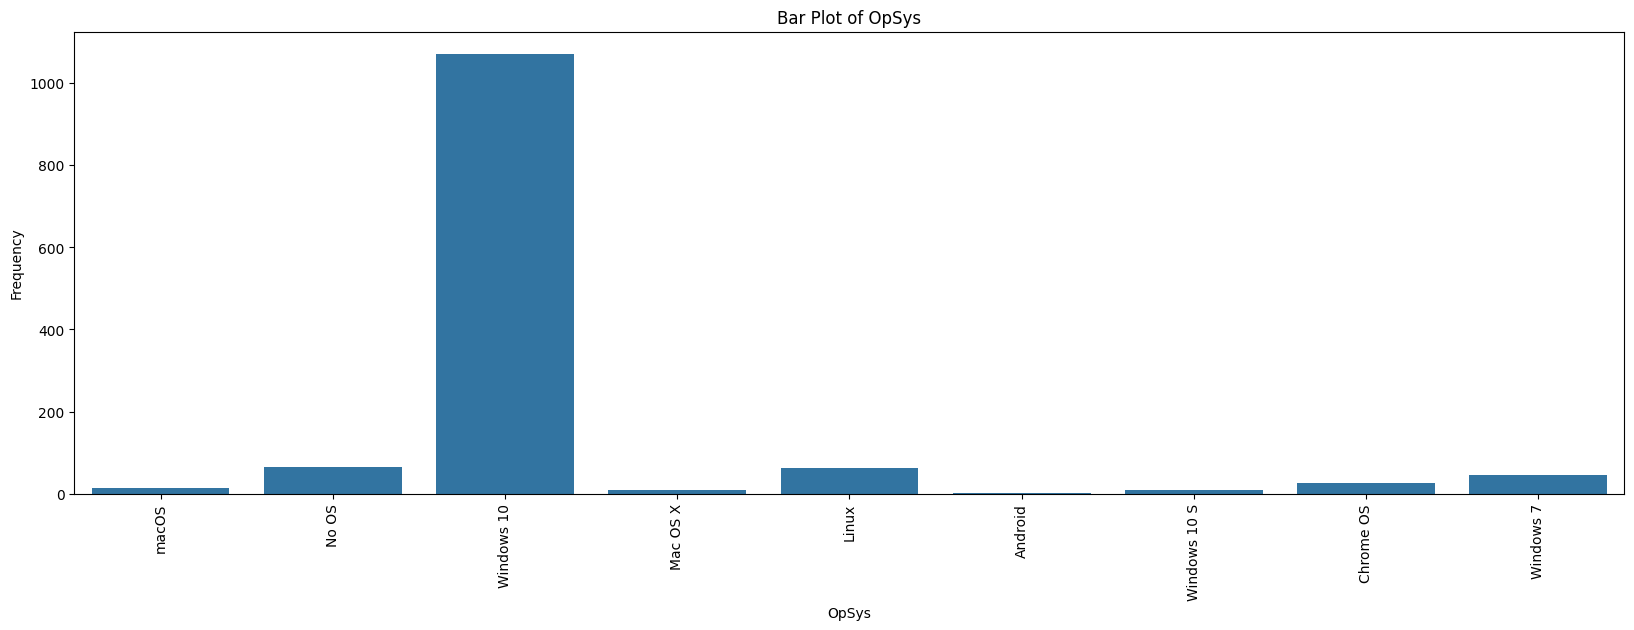

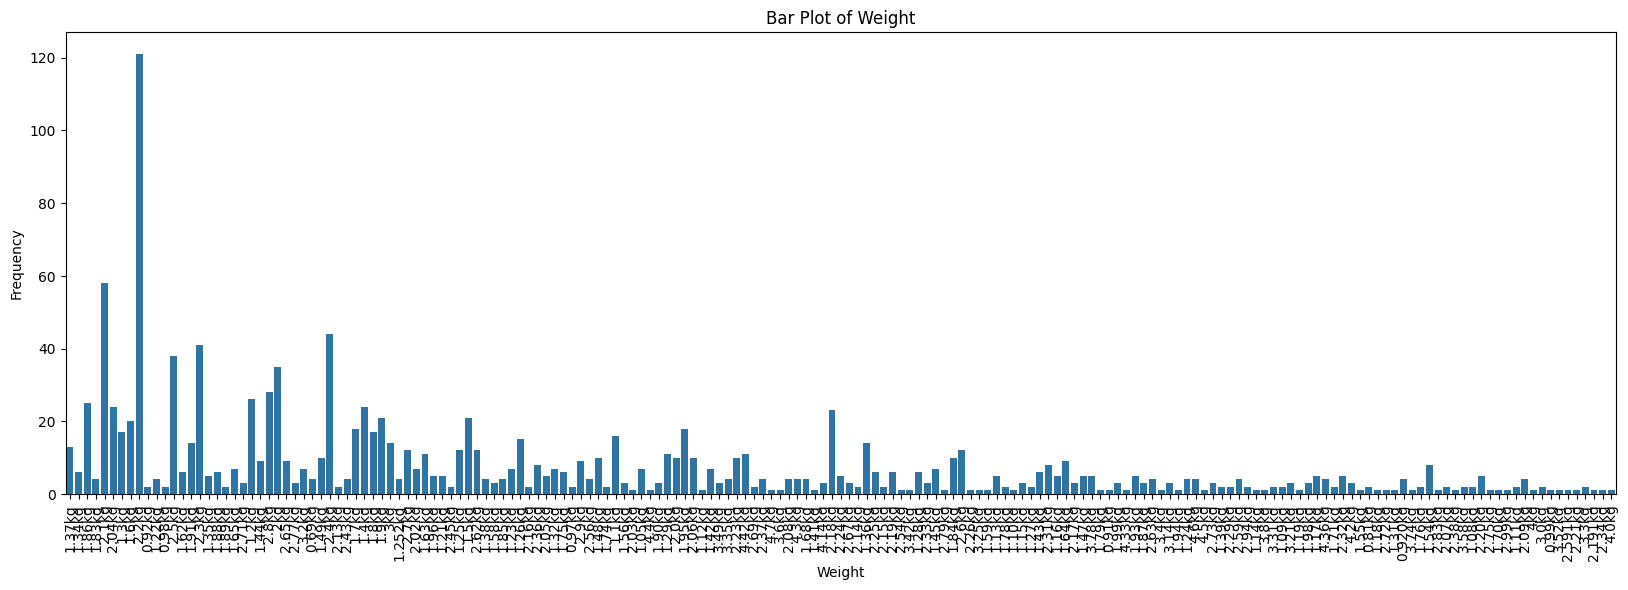

In [132]:
import seaborn as sns
def plot_barplot(data, feature, plot_size=(20, 6)):

    plt.figure(figsize=plot_size)
    sns.countplot(x=data[feature])
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
for cat in categorical_features:
    plot_barplot(df, cat)

## Turning categorical features into one hot / Cleaning Data


In [133]:
df = df.drop("Product", axis=1)

df = df.join(pd.get_dummies(df.Company))
df = df.drop("Company", axis=1)

df = df.join(pd.get_dummies(df.TypeName))
df = df.drop("TypeName", axis=1)

df

laptop_ID  Inches  ... Ultrabook Workstation
0             1    13.3  ...      True       False
1             2    13.3  ...      True       False
2             3    15.6  ...     False       False
3             4    15.4  ...      True       False
4             5    13.3  ...      True       False
...         ...     ...  ...       ...         ...
1298       1316    14.0  ...     False       False
1299       1317    13.3  ...     False       False
1300       1318    14.0  ...     False       False
1301       1319    15.6  ...     False       False
1302       1320    15.6  ...     False       False

[1303 rows x 35 columns]

In [134]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

df

laptop_ID  Inches  ... Windows 7  macOS
0             1    13.3  ...     False   True
1             2    13.3  ...     False   True
2             3    15.6  ...     False  False
3             4    15.4  ...     False   True
4             5    13.3  ...     False   True
...         ...     ...  ...       ...    ...
1298       1316    14.0  ...     False  False
1299       1317    13.3  ...     False  False
1300       1318    14.0  ...     False  False
1301       1319    15.6  ...     False  False
1302       1320    15.6  ...     False  False

[1303 rows x 43 columns]

In [135]:
df["Ram"] = df["Ram"].str[:-2]
df["Ram"] = df["Ram"].astype("int")

In [136]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [137]:
df = df.drop(columns="Memory")


In [138]:
df = df.join(pd.get_dummies(df["Memory Type"], prefix="MemoryType"))


In [139]:
df

laptop_ID  Inches  ... MemoryType_Hybrid MemoryType_SSD
0             1    13.3  ...             False           True
1             2    13.3  ...             False          False
2             3    15.6  ...             False           True
3             4    15.4  ...             False           True
4             5    13.3  ...             False           True
...         ...     ...  ...               ...            ...
1298       1316    14.0  ...             False           True
1299       1317    13.3  ...             False           True
1300       1318    14.0  ...             False          False
1301       1319    15.6  ...             False          False
1302       1320    15.6  ...             False          False

[1303 rows x 48 columns]

In [140]:
df = df.drop(columns= "Memory Type")

In [141]:
df

laptop_ID  Inches  ... MemoryType_Hybrid MemoryType_SSD
0             1    13.3  ...             False           True
1             2    13.3  ...             False          False
2             3    15.6  ...             False           True
3             4    15.4  ...             False           True
4             5    13.3  ...             False           True
...         ...     ...  ...               ...            ...
1298       1316    14.0  ...             False           True
1299       1317    13.3  ...             False           True
1300       1318    14.0  ...             False          False
1301       1319    15.6  ...             False          False
1302       1320    15.6  ...             False          False

[1303 rows x 47 columns]

In [142]:
df["ScreenType"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[0])
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [143]:
import re

df["ScreenType"] = df["ScreenType"].apply(
    lambda x: "Normal" if re.match(r"^\d+x\d+$", str(x)) else x
)

In [144]:
df = df.join(pd.get_dummies(df["ScreenType"], prefix="ScreenType"))
df = df.drop("ScreenResolution", axis=1)

In [145]:
df = df.drop(columns="ScreenType")

In [146]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])
df = df.drop("Cpu", axis=1)

df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [147]:
df["Ram"] = df["Ram"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [148]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [149]:
df["Weight"] = df["Weight"].str[:-2]
df["Weight"] = df["Weight"].astype("float")
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)

In [150]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

<Axes: >

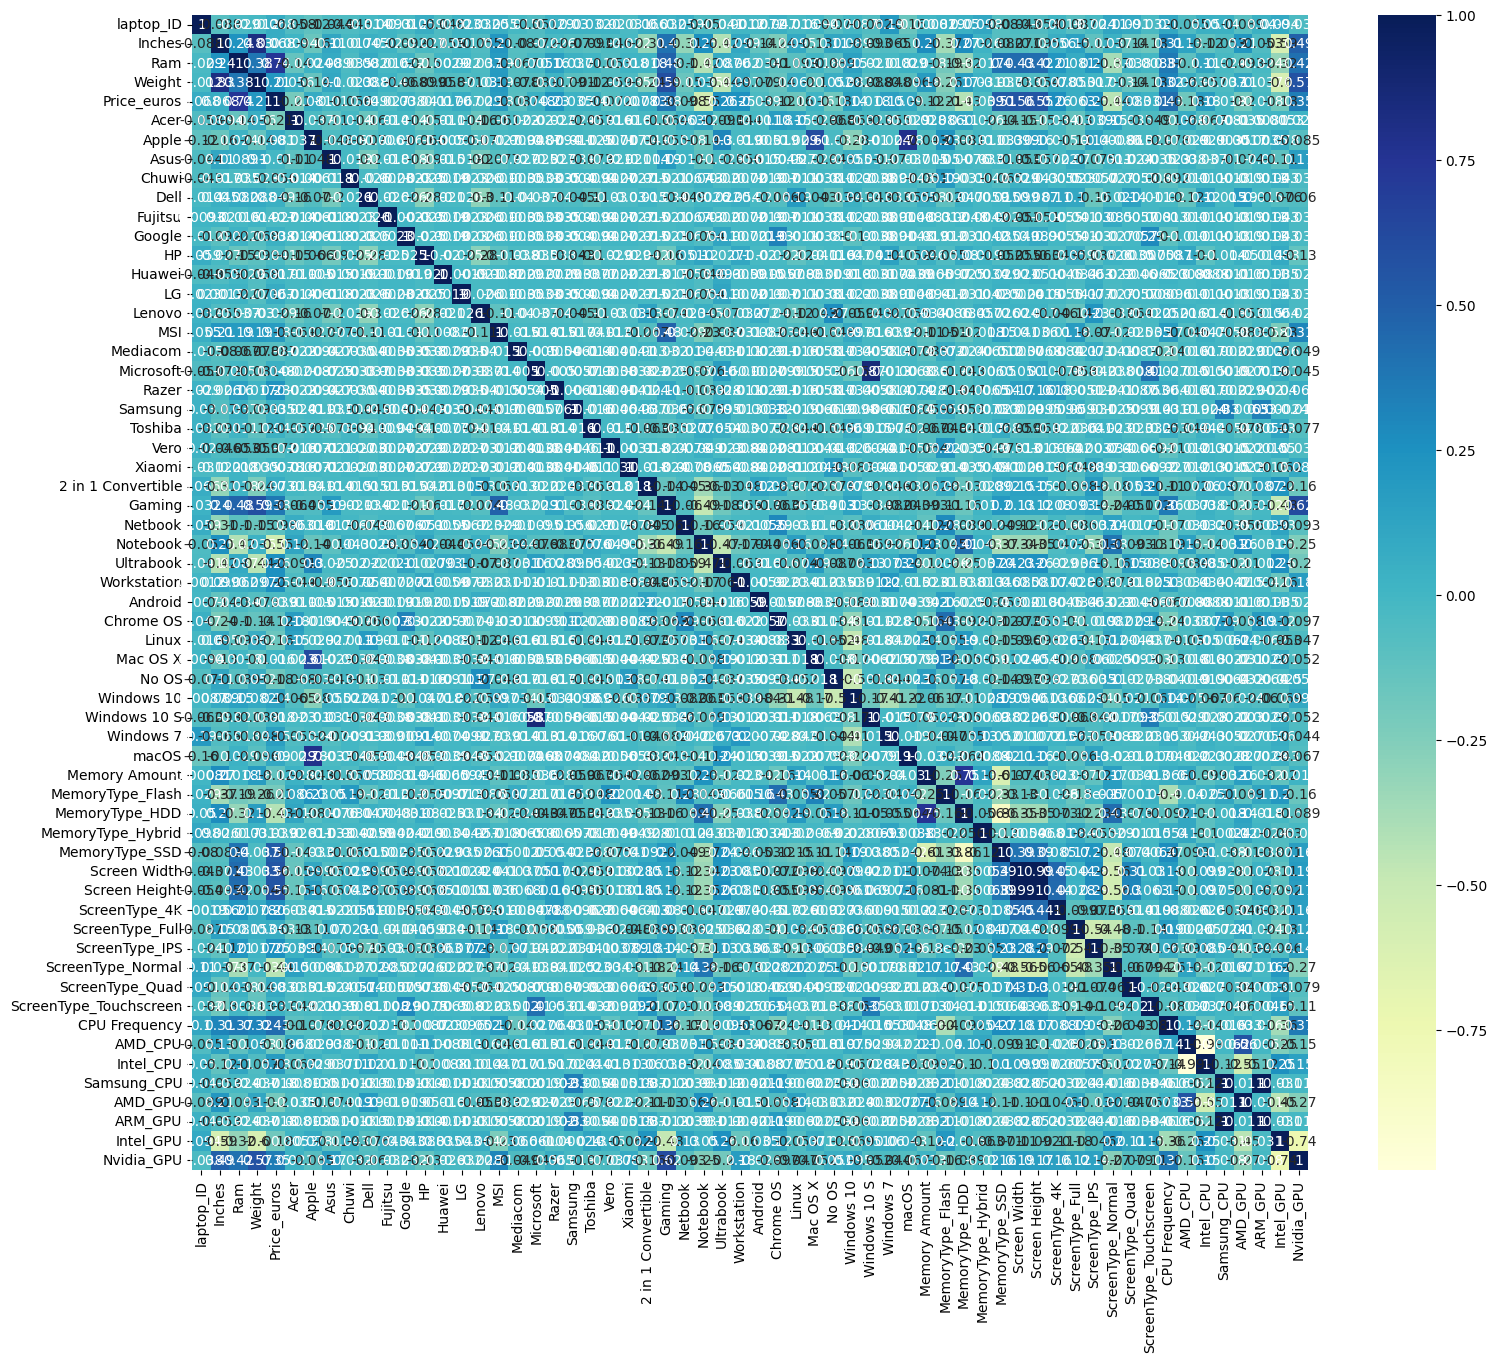

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [152]:
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()
target_correlations

Xiaomi                    0.000776
Asus                      0.010376
Mac OS X                  0.015656
Huawei                    0.016851
Windows 10 S              0.018312
ARM_GPU                   0.018431
Samsung_CPU               0.018431
Fujitsu                   0.027135
Lenovo                    0.029007
ScreenType_Touchscreen    0.030770
Samsung                   0.034584
Google                    0.038086
Android                   0.038700
MemoryType_Hybrid         0.039386
Toshiba                   0.040339
HP                        0.041291
Microsoft                 0.047562
Dell                      0.048509
Chuwi                     0.055646
ScreenType_Full           0.063322
LG                        0.067053
laptop_ID                 0.067830
Inches                    0.068197
Vero                      0.071972
2 in 1 Convertible        0.072675
Apple                     0.080688
ScreenType_Quad           0.082807
Mediacom                  0.087161
macOS                     0.089928
Netbook                   0.097572
Chrome OS                 0.118684
Memory Amount             0.122365
Windows 10                0.137048
Windows 7                 0.152381
Linux                     0.162060
No OS                     0.177094
MSI                       0.180100
AMD_CPU                   0.180111
Intel_CPU                 0.181127
Intel_GPU                 0.184205
AMD_GPU                   0.199415
Acer                      0.208349
Weight                    0.210370
MemoryType_Flash          0.210823
Razer                     0.233756
Workstation               0.249752
ScreenType_IPS            0.252208
Ultrabook                 0.255658
ScreenType_4K             0.263343
Nvidia_GPU                0.348797
Gaming                    0.375789
MemoryType_HDD            0.426121
CPU Frequency             0.430293
ScreenType_Normal         0.442115
MemoryType_SSD            0.513609
Notebook                  0.549248
Screen Height             0.552809
Screen Width              0.556529
Ram                       0.743007
Price_euros               1.000000
Name: Price_euros, dtype: float64

In [153]:
selected_features = target_correlations[-21:].index
selected_features = list(selected_features)
selected_features

['Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'MemoryType_Flash',
 'Razer',
 'Workstation',
 'ScreenType_IPS',
 'Ultrabook',
 'ScreenType_4K',
 'Nvidia_GPU',
 'Gaming',
 'MemoryType_HDD',
 'CPU Frequency',
 'ScreenType_Normal',
 'MemoryType_SSD',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [154]:
limited_df = df[selected_features]
limited_df

Intel_GPU  AMD_GPU   Acer  ...  Screen Width  Ram  Price_euros
0          True    False  False  ...          2560    8      1339.69
1          True    False  False  ...          1440    8       898.94
2          True    False  False  ...          1920    8       575.00
3         False     True  False  ...          2880   16      2537.45
4          True    False  False  ...          2560    8      1803.60
...         ...      ...    ...  ...           ...  ...          ...
1298       True    False  False  ...          1920    4       638.00
1299       True    False  False  ...          3200   16      1499.00
1300       True    False  False  ...          1366    2       229.00
1301      False     True  False  ...          1366    6       764.00
1302       True    False  False  ...          1366    4       369.00

[1303 rows x 21 columns]

<Axes: >

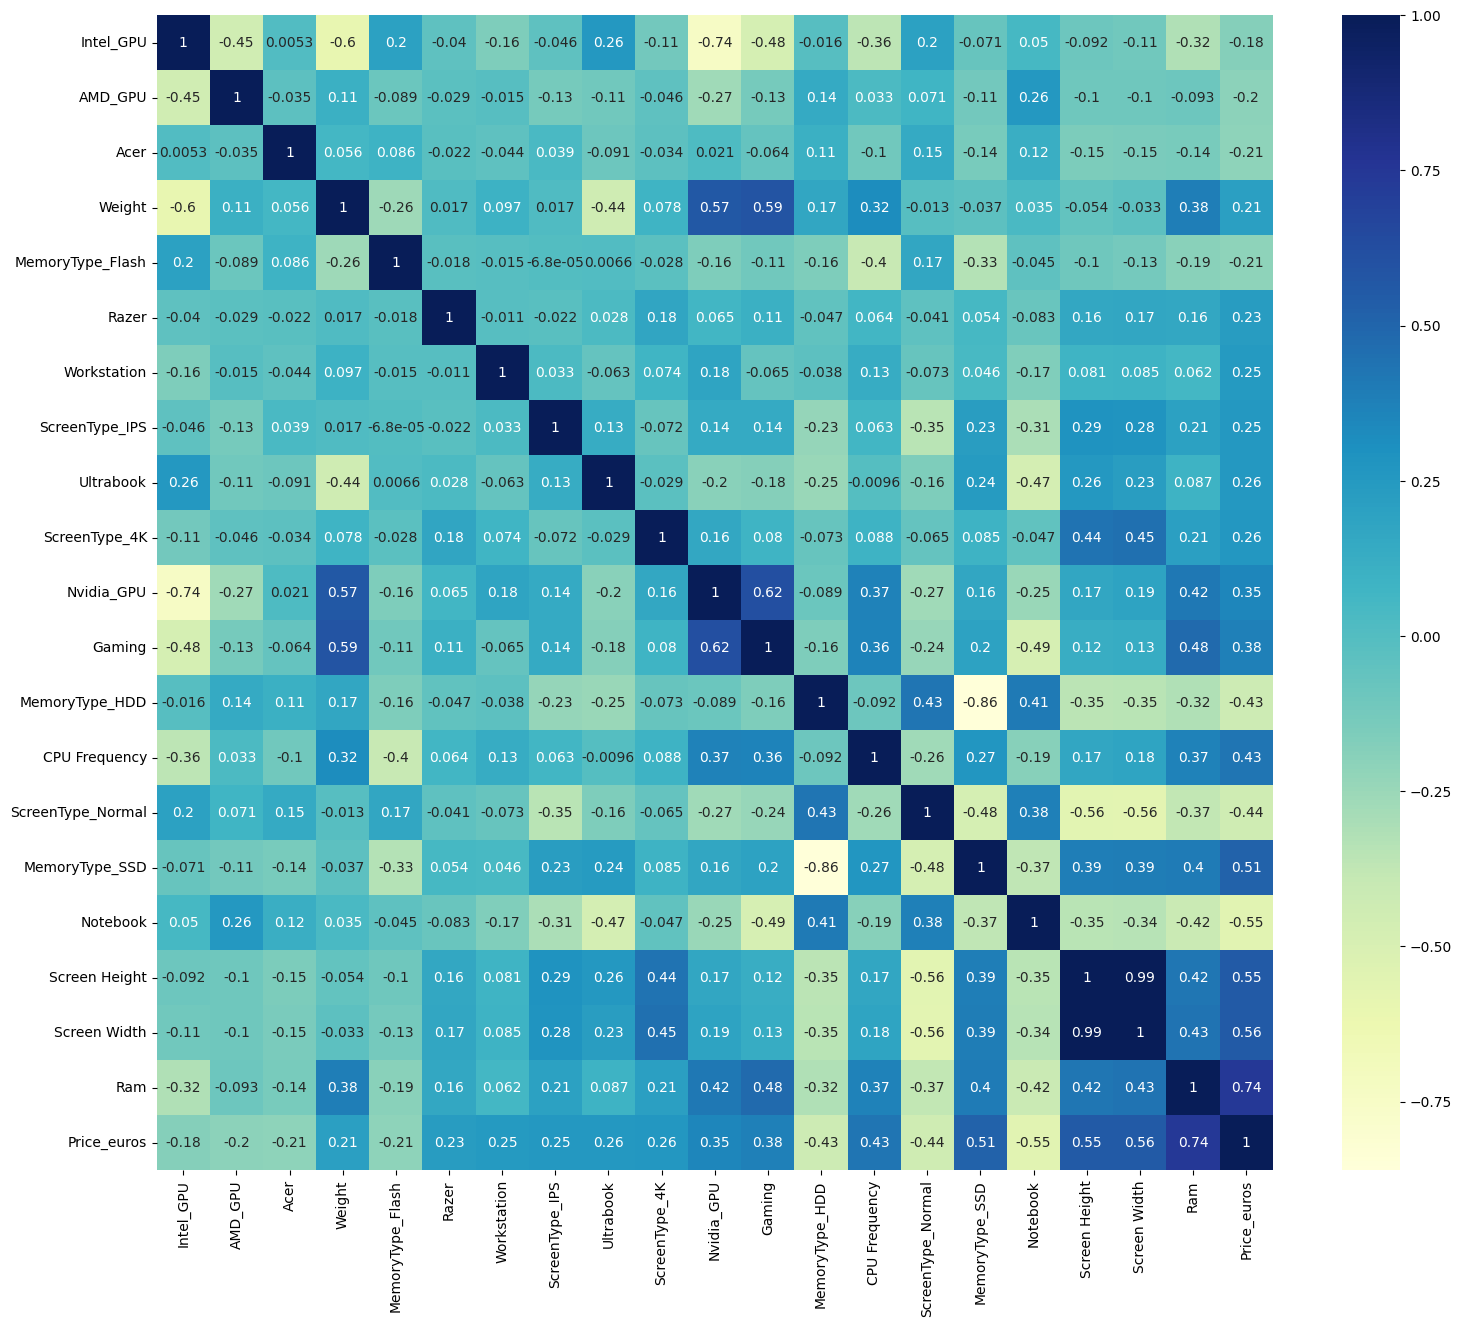

In [155]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

## Model Selection and Training and Testing Process

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [157]:
forest.score(X_test_scaled, y_test)

0.7989523315869211

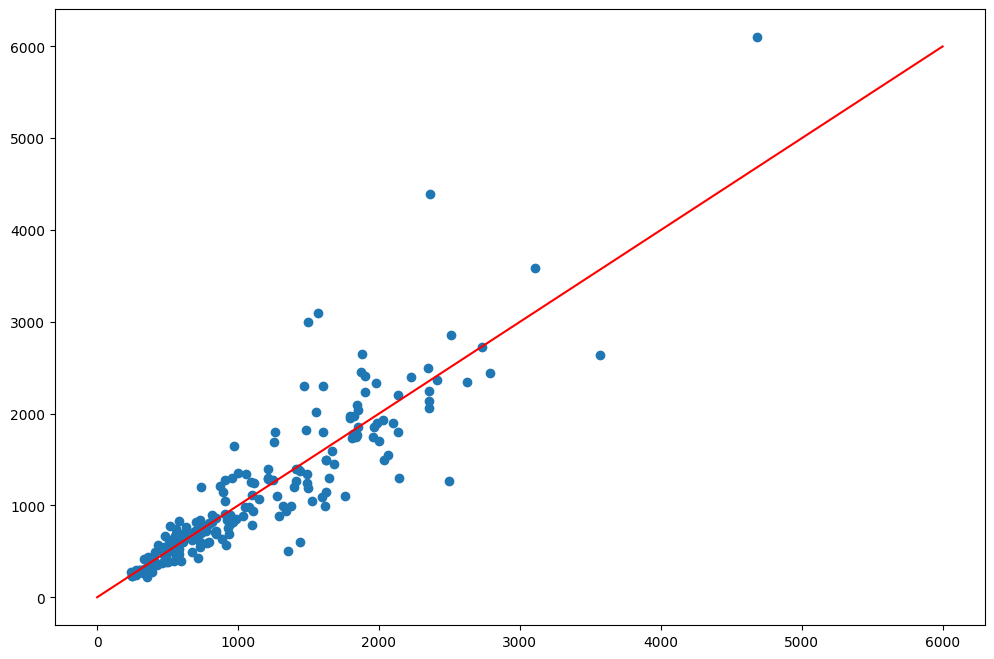

In [158]:
y_pred = forest.predict(X_test_scaled)
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [159]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [160]:
forest.predict(X_new_scaled)

array([718.4082])

In [161]:
y_test.iloc[0]

np.float64(429.0)

In [163]:
from xgboost import XGBRegressor

In [176]:
xgb = XGBRegressor(
  n_estimators=300,
    learning_rate=0.05,
    subsample=0.8,
    tree_method='hist',
    enable_categorical=True,
    random_state=42
)

In [177]:
xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [178]:
y_pred = xgb.predict(X_test_scaled)

In [179]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)

RMSE: 325.8763950592706


In [180]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.8387840868622769


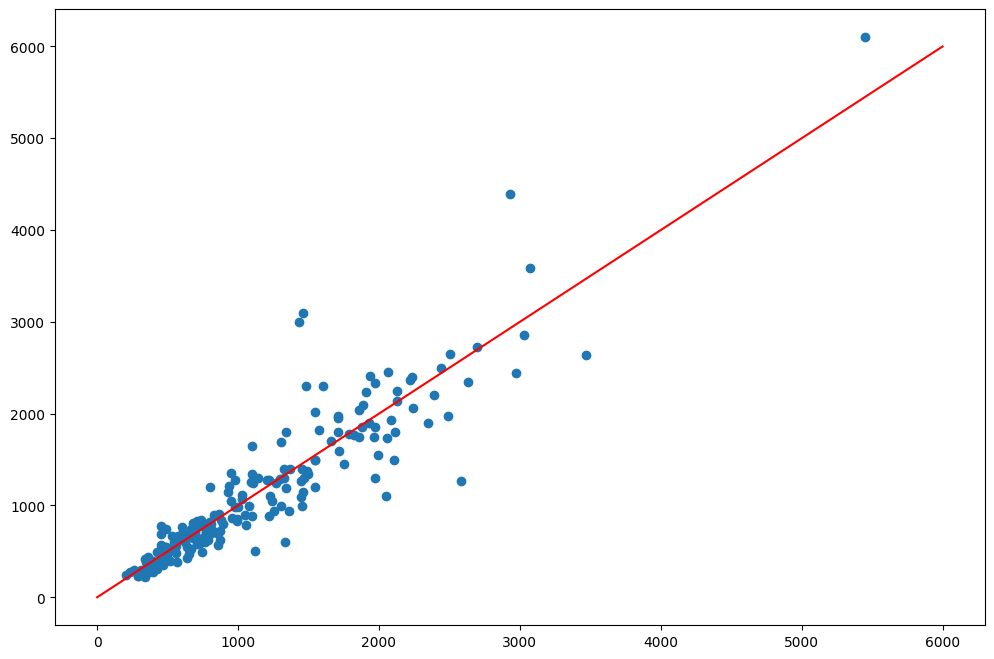

In [181]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")